In [4]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(55)
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist

# 0. Data preprocessing
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train shape: {} | x_test_shpae: {}".format(x_train.shape, x_test.shape))

x_train shape: (60000, 28, 28) | x_test_shpae: (10000, 28, 28)


In [7]:
# 1. Model Design
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax') # set output layer
])


In [9]:
# 2. Model Compile
model.compile(optimizer='SGD', # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy']) # set metrics to monitor

In [12]:
# Callback 
ACCURACY = 0.99
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > ACCURACY:
            print("Reached {}% accuracy, so stop training".format(ACCURACY))
            self.model.stop_training = True
callbacks = myCallback()

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  401920    
_________________________________________________________________
dense_5 (Dense)              multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3783 - accuracy: 0.8988
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3473 - accuracy: 0.9056
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3257 - accuracy: 0.9100
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3090 - accuracy: 0.9144
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2954 - accuracy: 0.9184
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2839 - accuracy: 0.9212
Epoch 7/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2739 - accuracy: 0.9241
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2649 - accuracy: 0.9264
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2567 - accuracy: 0.9283
Epoch 10/10
60

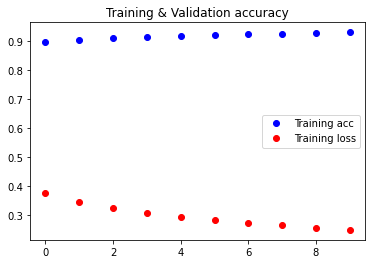

In [14]:
# 3. Model fit
history = model.fit(x_train, y_train, epochs=10, batch_size=128) # training
# history = model.fit(x_train, y_train, epochs=5, batch_size=128, callbacks=[callbacks]) # training



acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.title('Training & Validation accuracy')
plt.legend()
plt.show()

In [15]:
# 4. Model evaluation
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.23796595886945723, 0.9342]

In [ ]:
# 1. Model Design
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='linear'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # set output layer
])

# 2. Model Compile
model2.compile(optimizer='adam', # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy']) # set metrics to monitor

# 3. Model fit
history = model2.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.title('Training & Validation accuracy')
plt.legend()
plt.show()

# 4. Model evaluation
model2.evaluate(x_test, y_test)

In [ ]:
# 1. Model Design
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='linear'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # set output layer
])

# 2. Model Compile
model2.compile(optimizer='adam', # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy']) # set metrics to monitor

# 3. Model fit
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc = history2.history['accuracy']
loss = history2.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.title('Training & Validation accuracy')
plt.legend()
plt.show()

# 4. Model evaluation
model2.evaluate(x_test, y_test)